### Regression exercise

Today, we will fit different polynomial regression to randomly generated data and explore how our loss function behaves. We will use the formulas, introduced in the theoretical sections and create a linear regression model from scratch. 


#### Task 1

Write a function psi(x,m) defined as $\psi(x)=[1, x, x ^2, ..., x^m]$

In [59]:
import numpy as np
import pandas as pd
import plotly.express as px

In [83]:
def psi(x,m):
    return [x**i for i in range(m+1)]


In [84]:
psi(2,3)

[1, 2, 4, 8]

#### Task 2

Write a function $h(x,\alpha, m)$ defined as $h(x,\alpha, m)=\alpha^T\psi(x, m)$

In [85]:
def h(x, alpha, m):
    result = alpha.T.dot(psi(x,m))
    return result

#### Task 3
Create a random 3rd order polynomial (we call it p3)

In [48]:
def p3(x):
    return x**3 - 6*x

#### Task 4
Choose an interval [a,b], on which the polynomial is S-shaped.

In [49]:
interval = [-3,3]

#### Task 5
Sample 30 random values in [a,b] and stored them in `xs`.

In [55]:
xs = np.random.uniform(low=interval[0],high=interval[1] ,size=(30,))
xs

array([-2.32211172, -1.83658002, -1.51976682, -1.32032127,  1.48939583,
       -2.41123622,  0.46256755,  0.59206958, -1.15304206, -0.12742351,
       -0.76225314,  2.6495026 , -0.10942306,  0.99921438, -2.23856031,
       -1.94788193,  2.47813641, -1.94730432, -0.28444531, -2.80685169,
       -0.23102147,  0.59212806, -2.3509935 , -0.12147538,  1.11850327,
        0.36959092,  1.9827912 ,  1.77994408,  1.22344166, -1.67888434])

#### Task 6
For each x in xs, compute p3(x) and store them as `ys`.

In [56]:
ys = [p3(x) for x in xs]


#### Task 7:
Plot `ys` against `xs` on [a,b]. Does it look like a third order polynomial?

In [79]:
df = pd.DataFrame({'xs': xs, 'ys': ys})
df = df.sort_values('xs')


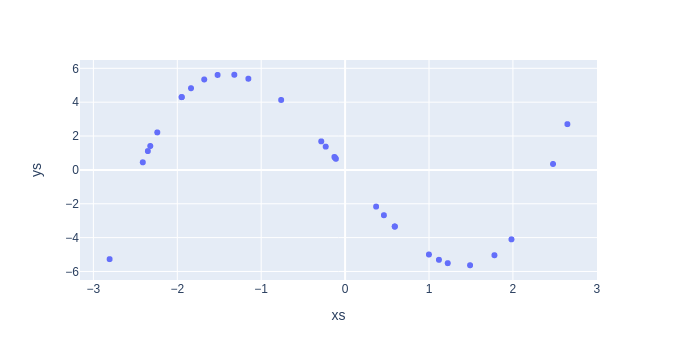

In [81]:
px.scatter(df, x='xs', y='ys')

## Fitting the data

We will try to fit the data by a polynomial of order m=2. 

#### Task 8:

Using xs and psi, create the matrix X defined as 

<img src="matrixX.png">

In [89]:
X = [psi(x,2)[1:] for x in xs]
X

[[-2.322111721321008, 5.392202846296414],
 [-1.8365800247420419, 3.373026187281479],
 [-1.5197668162779157, 2.309691175859512],
 [-1.3203212660428238, 1.7432482455649252],
 [1.4893958314299525, 2.2182999426809196],
 [-2.4112362189022267, 5.814060103345907],
 [0.46256755444512176, 0.2139687424253407],
 [0.5920695813957417, 0.35054638921412884],
 [-1.153042058340452, 1.3295059883019862],
 [-0.1274235102756549, 0.01623675097096993],
 [-0.7622531435207427, 0.581029854807254],
 [2.649502596800203, 7.01986401045102],
 [-0.10942306118792988, 0.011973406319737447],
 [0.9992143826328697, 0.9984293824603868],
 [-2.2385603054953034, 5.011152241339226],
 [-1.9478819339969444, 3.7942440287916765],
 [2.4781364055776116, 6.141160044649125],
 [-1.9473043153583034, 3.7919940966130707],
 [-0.28444531233586723, 0.08090913570984906],
 [-2.8068516920037467, 7.878416420904296],
 [-0.23102147306709764, 0.05337092101809172],
 [0.592128064279998, 0.35061564450797744],
 [-2.3509935032010016, 5.527170452093318],

#### Task 9
Compute the optimal $\alpha$ using the expression $\alpha = (XX^T)^+Xy$ where $(XX^T)^+$ is the pseudoinverse matrix. y is our `ys` from the Task 6.

#### Task 10
Plot the data and the computed polynomial. Does it fit?

#### Task 11
Repeat the process for m=3,…,10. What do you observe?

#### Task 12
Plot the value of the loss (defined as $ l(\alpha^Tx, y) = \sum(\alpha^Tx - y)^2 $  ) for m=2,…,10. y is our `ys` from the Task 6. What do you observe? Could you tell the optimal m from the plot?